### We will write some updated code using Tf for cifar
#### We will load data from Keras anyways it is the same

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import cifar10 as cifar

In [37]:
(x_train,y_train),(x_test,y_test)=cifar.load_data()

In [38]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [39]:
y_train=tf.one_hot(y_train,depth=10)
y_train=tfds.as_numpy(y_train)

In [40]:
y_train=np.reshape(y_train,(-1,10))

In [41]:
y_train.shape

(50000, 10)

In [42]:
y_test=tf.one_hot(y_test,depth=10)
y_test=tfds.as_numpy(y_test)
y_test=np.reshape(y_test,(-1,10))

In [43]:
y_test.shape

(10000, 10)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


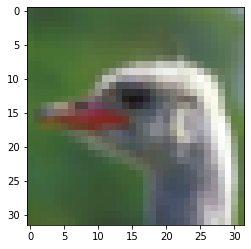

In [44]:
sample=x_train[2343]
plt.imshow(sample)
print(y_train[2343])

### its a bird yes!!

#### Data preprocessing

In [45]:
x_train.max()

255

In [46]:
x_train=x_train/255
x_test=x_test/255

In [47]:
x_train.dtype

dtype('float64')

### lets start creating model

In [48]:
def init_weights(input_shape):
    weight_vals=tf.compat.v1.truncated_normal(input_shape,stddev=0.1)
    return tf.Variable(weight_vals)
def init_bias(size):
    bias_vals=tf.constant(0.1,shape=size)
    return tf.Variable(bias_vals)
def con2d(input_data,filters):
    return tf.nn.conv2d(input_data,filters=filters,strides=[1,2,2,1],padding='SAME')
def convolution_layer(input_data,shape):
    weight=init_weights(shape)
    bias=init_bias([shape[3]])
    return tf.nn.relu(con2d(input_data,weight)+bias)
def max_pool2by2(input_data):
    return tf.nn.relu(tf.nn.max_pool2d(input_data,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME'))
def normal_full_layer(input_data,size):
    input_size=input_data.get_shape()[1]
    print(input_data.get_shape())
    weight=init_weights([input_size,size])
    bias=init_bias([size])
    return tf.matmul(input_data,weight)+bias
def drop_out(input_data,rate):
    return tf.nn.dropout(input_data,rate=rate)

In [49]:
tf.compat.v1.disable_eager_execution()

In [50]:
x=tf.compat.v1.placeholder(tf.float32,shape=[None,3072])
x_image=tf.reshape(x,shape=[-1,32,32,3])
y_image=tf.compat.v1.placeholder(tf.float32,shape=[None,10])
hold_prob=tf.compat.v1.placeholder(tf.float32)

In [51]:
x_image

<tf.Tensor 'Reshape_4:0' shape=(None, 32, 32, 3) dtype=float32>

In [52]:
conv_1=convolution_layer(x_image,[2,2,3,32])
maxpool_1=max_pool2by2(conv_1)
conv_2=convolution_layer(maxpool_1,[2,2,32,64])
maxpool_2=max_pool2by2(conv_2)
drop_1=drop_out(maxpool_2,hold_prob)
conv_3=convolution_layer(drop_1,[2,2,64,128])
maxpool_3=max_pool2by2(conv_3)
conv_4=convolution_layer(maxpool_3,[2,2,128,256])
maxpool_4=max_pool2by2(conv_4)
drop_2=drop_out(maxpool_4,hold_prob)
flatten=tf.reshape(drop_2,shape=(-1,1*1*256))
dense=tf.nn.relu(normal_full_layer(flatten,1024))
dense2=tf.nn.relu(normal_full_layer(dense,2048))
drop_out=drop_out(dense2,hold_prob)
y_pred=tf.nn.softmax(normal_full_layer(drop_out,10))

(None, 256)
(None, 1024)
(None, 2048)


In [53]:
drop_2

<tf.Tensor 'dropout_7/mul_1:0' shape=(None, 1, 1, 256) dtype=float32>

In [54]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_image,logits=y_pred))

In [55]:
optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001)
train=optimizer.minimize(cross_entropy)

In [57]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    batch_size=10000
    for i in range(batch_size):
        rand_int=np.random.randint(len(y_train),size=200)
        sess.run(train,feed_dict={x_image:x_train[rand_int],y_image:y_train[rand_int],hold_prob:0.3})
        if i%100==0:
            print("Step:{}".format(i))
            
            matches=tf.equal(tf.argmax(y_pred,1),tf.argmax(y_image,1))
            accuracy=tf.reduce_mean(tf.cast(matches,tf.float32))
            print("Accuracy:{}".format(sess.run(accuracy,feed_dict={x_image:x_test,y_image:y_test,hold_prob:0.3})))

Step:0
Accuracy:0.10159999877214432
Step:100
Accuracy:0.1193000003695488
Step:200
Accuracy:0.15889999270439148
Step:300
Accuracy:0.20170000195503235
Step:400
Accuracy:0.23330000042915344
Step:500
Accuracy:0.2612999975681305
Step:600
Accuracy:0.2745000123977661
Step:700
Accuracy:0.29010000824928284
Step:800
Accuracy:0.29589998722076416
Step:900
Accuracy:0.31679999828338623
Step:1000
Accuracy:0.320499986410141
Step:1100
Accuracy:0.3294000029563904
Step:1200
Accuracy:0.33000001311302185
Step:1300
Accuracy:0.34389999508857727
Step:1400
Accuracy:0.33970001339912415
Step:1500
Accuracy:0.3467000126838684
Step:1600
Accuracy:0.35760000348091125
Step:1700
Accuracy:0.3589000105857849
Step:1800
Accuracy:0.364300012588501
Step:1900
Accuracy:0.36090001463890076
Step:2000
Accuracy:0.3659999966621399
Step:2100
Accuracy:0.3707999885082245
Step:2200
Accuracy:0.3736000061035156
Step:2300
Accuracy:0.38440001010894775
Step:2400
Accuracy:0.37689998745918274
Step:2500
Accuracy:0.3853999972343445
Step:2600
Ac